### 1.问题描述
##### 本次作业中自行选择2个数据集进行探索性分析与预处理
### 2.所选数据集
##### （1）Alzheimer Disease and healthy aging data in US
##### （2）Movies Dataset from Pirated Sites

### 3.对数据集1：Alzheimer的数据分析
##### 3.1 数据摘要


In [176]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime

In [177]:
# load data
csv_path="/data/yanmuge/yanmuge/hyperRecon/freq_dau/datamining/datasets/alzheimer/Alzheimer Disease and Healthy Aging Data In US.csv"
data_csv=pd.read_csv(csv_path)

# data attributes
data_csv.head(5)

/data/yanmuge/yanmuge/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


In [178]:
data_csv.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

In [179]:
data_csv.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Class                         object
Topic                         object
Question                      object
Data_Value_Unit               object
DataValueTypeID               object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit          object
High_Confidence_Limit         object
Sample_Size                  float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
Geolocation                   object
ClassID                       object
TopicID                       object
QuestionID                    object
LocationID                     int64
StratificationCategoryID1     object
StratificationID1             object
S

In [180]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
YearStart                    214462 non-null int64
YearEnd                      214462 non-null int64
LocationAbbr                 214462 non-null object
LocationDesc                 214462 non-null object
Datasource                   214462 non-null object
Class                        214462 non-null object
Topic                        214462 non-null object
Question                     214462 non-null object
Data_Value_Unit              214462 non-null object
DataValueTypeID              214462 non-null object
Data_Value_Type              214462 non-null object
Data_Value                   144629 non-null float64
Data_Value_Alt               144629 non-null float64
Low_Confidence_Limit         144472 non-null object
High_Confidence_Limit        144472 non-null object
Sample_Size                  0 non-null float64
StratificationCategory1      214462 non-null object
Stratific

##### 3.1.1 标称属性：给出每个可能取值的频数
##### 3.1.2 数值属性：给出五数概括及缺失值的个数
以前两个属性“YearStart”和“YearEnd”为例进行实验

In [181]:
# YearStart
print("属性频数")
attri="YearStart"
print("YearStart Attributes frequency analysis")
data_csv[attri].value_counts(dropna=False)

属性频数
YearStart Attributes frequency analysis


2015    45980
2020    36006
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearStart, dtype: int64

In [182]:
# 五数概括
print("五数概括")
for i in range(0,5):
    q=i*0.25
    print("Q%d:"%(i),end=" ")
    print(data_csv[attri].quantile(q))

五数概括
Q0: 2015.0
Q1: 2016.0
Q2: 2017.0
Q3: 2019.0
Q4: 2020.0


In [183]:
# YearEnd
print("属性频数")
attri="YearEnd"
print("YearEnd Attributes frequency analysis")
data_csv[attri].value_counts(dropna=False)

属性频数
YearEnd Attributes frequency analysis


2020    46966
2015    35020
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearEnd, dtype: int64

In [184]:
# 五数概括
print("五数概括")
for i in range(0,5):
    q=i*0.25
    print("Q%d:"%(i),end=" ")
    print(data_csv[attri].quantile(q))

五数概括
Q0: 2015.0
Q1: 2016.0
Q2: 2018.0
Q3: 2019.0
Q4: 2020.0


##### 对全部属性进行分析

In [185]:
# data_csv[].value_counts(dropna=False)
print("属性频数")
attributes=["YearStart","YearEnd","LocationAbbr","LocationDesc","Datasource","Class","Topic","Question","Data_Value_Unit","DataValueTypeID","Data_Value_Type","Data_Value","Data_Value_Alt","Low_Confidence_Limit","High_Confidence_Limit","Sample_Size","StratificationCategory1","Stratification1","StratificationCategory2","Stratification2","Geolocation","ClassID","TopicID","QuestionID","LocationID","StratificationCategoryID1","StratificationID1","StratificationCategoryID2","StratificationID2"]
# print(len(attributes))
for i in range(len(attributes)):
    print(f"{attributes[i]} Attributes frequency analysis")
    print(data_csv[attributes[i]].value_counts(dropna=False))

属性频数
YearStart Attributes frequency analysis
2015    45980
2020    36006
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearStart, dtype: int64
YearEnd Attributes frequency analysis
2020    46966
2015    35020
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearEnd, dtype: int64
LocationAbbr Attributes frequency analysis
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      334

In [186]:
print("五数概括")
data_csv.describe().loc[['min','25%','50%','75%','max'],:]

五数概括


,YearStart,YearEnd,Data_Value,Data_Value_Alt,Sample_Size,LocationID
min,2015.0,2015.0,0.0,0.0,NaN,1.0
25%,2016.0,2016.0,15.3,15.3,NaN,18.0
50%,2017.0,2018.0,32.5,32.5,NaN,33.0
75%,2019.0,2019.0,56.8,56.8,NaN,49.0
max,2020.0,2020.0,100.0,100.0,NaN,9004.0


##### 统计所有属性的缺失值个数

In [187]:
print(data_csv.isnull().sum(axis=0))

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                    69833
Data_Value_Alt                69833
Low_Confidence_Limit          69990
High_Confidence_Limit         69990
Sample_Size                  214462
StratificationCategory1           0
Stratification1                   0
StratificationCategory2       27669
Stratification2               27669
Geolocation                   23049
ClassID                           0
TopicID                           0
QuestionID                        0
LocationID                        0
StratificationCategoryID1         0
StratificationID1                 0
StratificationCategoryID2   

可以看到属性"Data_Value","Data_value_Alt","Low_Confidence_Limit","High_Confidence_Limit"."Sample_size","StratificationCategory2","Stratification2","Geolocation"这几个属性都有大量的缺失值，其他属性没有缺失值。

##### 3.1.2 数据可视化
##### 使用直方图、盒图等检查数据分布及离群点
以属性“YearStart”,“LocationDesc”和“LocationID”为例
##### 1.“YearStart”

直方图


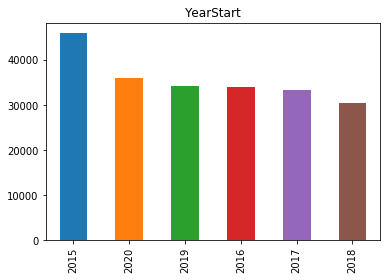

In [188]:
attri="YearStart"
print("直方图")
data_csv[attri].value_counts(dropna=False).plot(kind="bar",title=attri)
plt.show()

盒图


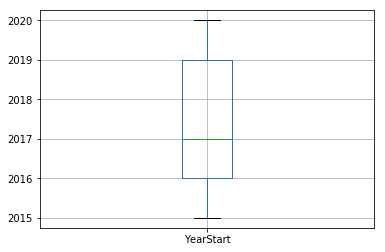

In [189]:
attri="YearStart"
print("盒图")
p=data_csv.boxplot([attri],return_type='dict')

In [190]:
# check isolated point
print(p['fliers'][0].get_ydata())
# print("MIN: ",end=" ")
# print(min(p['fliers'][0].get_ydata()))

[]


由于打印出离群点的数组为空，说明这个属性对应的数据没有离群点，数据分布良好。

##### 2."LocationDesc"

直方图


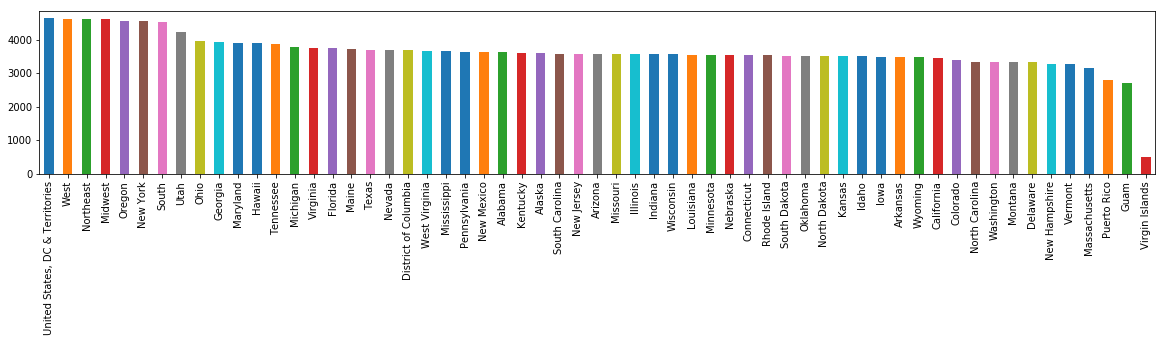

In [191]:
attri="LocationDesc"
print("直方图")
data_csv[attri].value_counts(dropna=False).plot(kind="bar",figsize=(20,3))

##### (3)LocationID

直方图


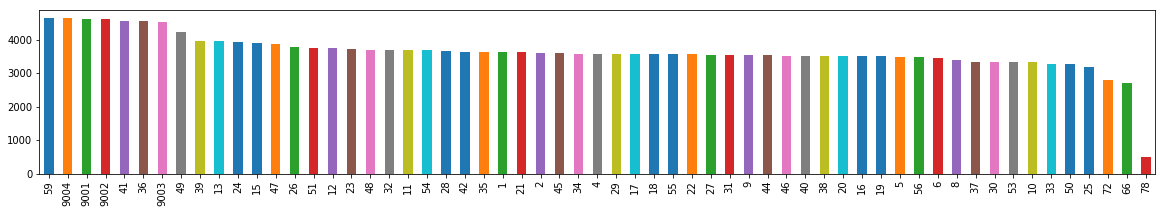

In [192]:
attri="LocationID"
print("直方图")
data_csv[attri].value_counts(dropna=False).plot(kind="bar",figsize=(20,3))

盒图


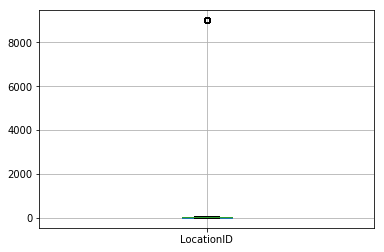

In [193]:
print("盒图")
p=data_csv.boxplot([attri],return_type='dict')

In [194]:
# check isolated point
print(p['fliers'][0].get_ydata())
print("MIN: ",end=" ")
print(min(p['fliers'][0].get_ydata()))

[9002 9001 9003 ... 9004 9004 9004]
MIN:  9001


由于打印出离群点的数组不为空，且通过盒图也可以看出大于9000的点均为离群点。

##### 3.2 数据缺失的处理
再次统计数据属性的缺失情况

In [195]:
print(data_csv.isnull().sum(axis=0))

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                    69833
Data_Value_Alt                69833
Low_Confidence_Limit          69990
High_Confidence_Limit         69990
Sample_Size                  214462
StratificationCategory1           0
Stratification1                   0
StratificationCategory2       27669
Stratification2               27669
Geolocation                   23049
ClassID                           0
TopicID                           0
QuestionID                        0
LocationID                        0
StratificationCategoryID1         0
StratificationID1                 0
StratificationCategoryID2   

1.将缺失部分剔除，此处剔除“Sample_Size”

In [196]:
attri="Sample_Size"
data_csv=data_csv.drop(attri,axis=1)
data_csv.head(5)
# d_delete.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


将缺失部分剔除的方法无法进行可视化对新旧数据集进行对比，因此此处省略这一步骤。

2.用最高频率值来填补缺失值，此处处理“Geolocation”

In [197]:
attri="Geolocation"
data_csv[attri]=data_csv[attri].fillna(str(data_csv[attri].mode()[0]))
print(data_csv)

        YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0            2020     2020           HI       Hawaii      BRFSS   
1            2017     2017           ID        Idaho      BRFSS   
2            2017     2017           ID        Idaho      BRFSS   
3            2018     2018           ID        Idaho      BRFSS   
4            2020     2020           IN      Indiana      BRFSS   
5            2020     2020           IA         Iowa      BRFSS   
6            2020     2020           IA         Iowa      BRFSS   
7            2019     2019           IA         Iowa      BRFSS   
8            2019     2019           IA         Iowa      BRFSS   
9            2018     2018           IA         Iowa      BRFSS   
10           2020     2020           KS       Kansas      BRFSS   
11           2019     2019           KS       Kansas      BRFSS   
12           2017     2017           KS       Kansas      BRFSS   
13           2018     2018           KS       Kansas      BRFS

下面检查经过这一操作之后该属性是否还有缺失值。

In [198]:
print(data_csv[attri].isnull().sum(axis=0))

0


通过运行代码可以看到缺失值全部补齐，缺失值的个数为0.

由于地理位置属于文本信息，无法绘制直方图盒盒图，因此无法对这一属性进行新旧数据的可视化对比分析。

3.通过属性的相关关系来填补缺失值,这里处理具有相关性的"Data_Value","Data_Value_Alt","Low_Confidence_Limit"和"High_Confidence_Limit"四个属性，由于后两个属性类型为object，应当转换为数值型才可以进一步处理。

In [199]:
# =data_csv.copy()
data_csv['Low_Confidence_Limit']=pd.to_numeric(data_csv['Low_Confidence_Limit'],errors='coerce')
data_csv['High_Confidence_Limit']=pd.to_numeric(data_csv['High_Confidence_Limit'],errors='coerce')

In [200]:
# compute correlation matrix
df=data_csv.copy()
corr_matrix=df.corr()
# print(corr_matrix.size())
corr_matrix

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
YearStart,1.000000,0.808550,0.040190,0.040190,0.043679,0.035203,0.006805
YearEnd,0.808550,1.000000,0.010573,0.010573,0.002832,0.018413,0.003154
Data_Value,0.040190,0.010573,1.000000,1.000000,0.983967,0.983857,-0.012051
Data_Value_Alt,0.040190,0.010573,1.000000,1.000000,0.983967,0.983857,-0.012051
Low_Confidence_Limit,0.043679,0.002832,0.983967,0.983967,1.000000,0.939058,-0.024691
High_Confidence_Limit,0.035203,0.018413,0.983857,0.983857,0.939058,1.000000,0.011631
LocationID,0.006805,0.003154,-0.012051,-0.012051,-0.024691,0.011631,1.000000


In [201]:
na_columns=data_csv.loc[:,(data_csv.isnull().any())].columns
for column in na_columns[:4]:
    highest_corr=corr_matrix[column].sort_values(ascending=False).index[1]
    df[column].fillna(df[highest_corr].mean(),inplace=True)

下面检查经过这一操作后是否还有缺失值：

In [202]:
print(df['Low_Confidence_Limit'].isnull().sum(axis=0))
print(df['High_Confidence_Limit'].isnull().sum(axis=0))
print(df['Data_Value'].isnull().sum(axis=0))
print(df['Data_Value_Alt'].isnull().sum(axis=0))

0
0
0
0


由此可以看出通过计算属性间相关性的方法填补了对应的缺失值。

4.通过数据对象之间的相似性来填补缺失值
对于数值属性使用均值来填充缺失值；对于标称属性使用众数来填充缺失值。

In [203]:
# 对object类型进行数值转换
df=data_csv.copy()
df['Low_Confidence_Limit'] = pd.to_numeric(df['Low_Confidence_Limit'], errors='coerce')
df['High_Confidence_Limit'] = pd.to_numeric(df['High_Confidence_Limit'], errors='coerce')

In [204]:
for column in na_columns[:4]:
    df[column].fillna(df[column].mean(), inplace=True)

for column in na_columns[4:]:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

In [205]:
print(df.isnull().sum(axis=0))
# data_csv=df

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Datasource                   0
Class                        0
Topic                        0
Question                     0
Data_Value_Unit              0
DataValueTypeID              0
Data_Value_Type              0
Data_Value                   0
Data_Value_Alt               0
Low_Confidence_Limit         0
High_Confidence_Limit        0
StratificationCategory1      0
Stratification1              0
StratificationCategory2      0
Stratification2              0
Geolocation                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategoryID1    0
StratificationID1            0
StratificationCategoryID2    0
StratificationID2            0
dtype: int64


可以看到，此时所有缺失值都填充完毕，数据不再有缺失值。

##### 3.3 可视化对比新旧数据集的差异
对所有缺失属性进行对比，缺失属性如下：

In [207]:
na_columns

Index(['Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'StratificationCategory2', 'Stratification2'],
      dtype='object')

由于Geolocation为Point型坐标数据，无法进行直方图和盒图的分析，另外Sample_Size为整列缺失，所以直接删除整列从而没有任何数据，也无法进行直方图和盒图的分析。
所以下面我们分别对其他六个属性进行可视化对比分析。

(1) "Data_Value"

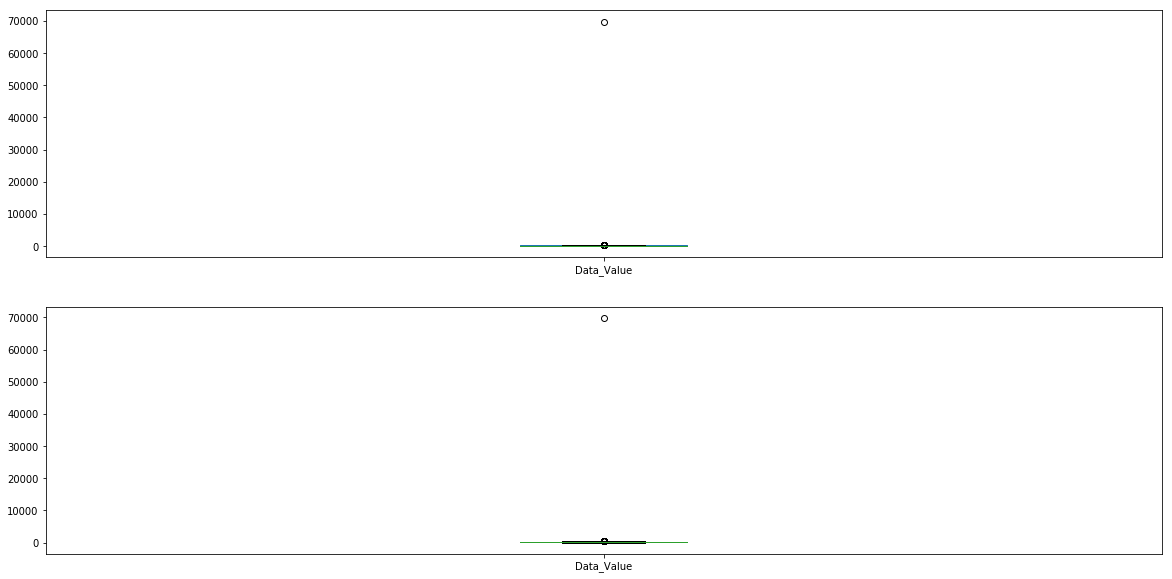

In [211]:
attri="Data_Value"
matplotlib.pyplot.subplot(2,1,1)
data_csv[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))
matplotlib.pyplot.subplot(2,1,2)
df[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))

(2) "Data_Value_Alt"

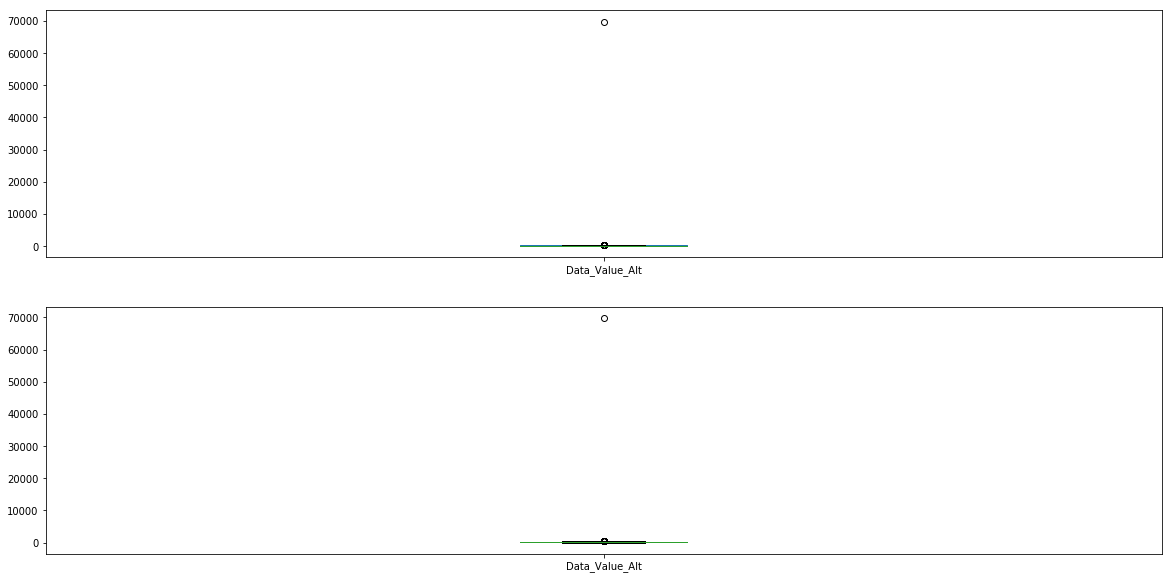

In [212]:
attri="Data_Value_Alt"
matplotlib.pyplot.subplot(2,1,1)
data_csv[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))
matplotlib.pyplot.subplot(2,1,2)
df[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))

(3) "Low_Confidence_Limit"

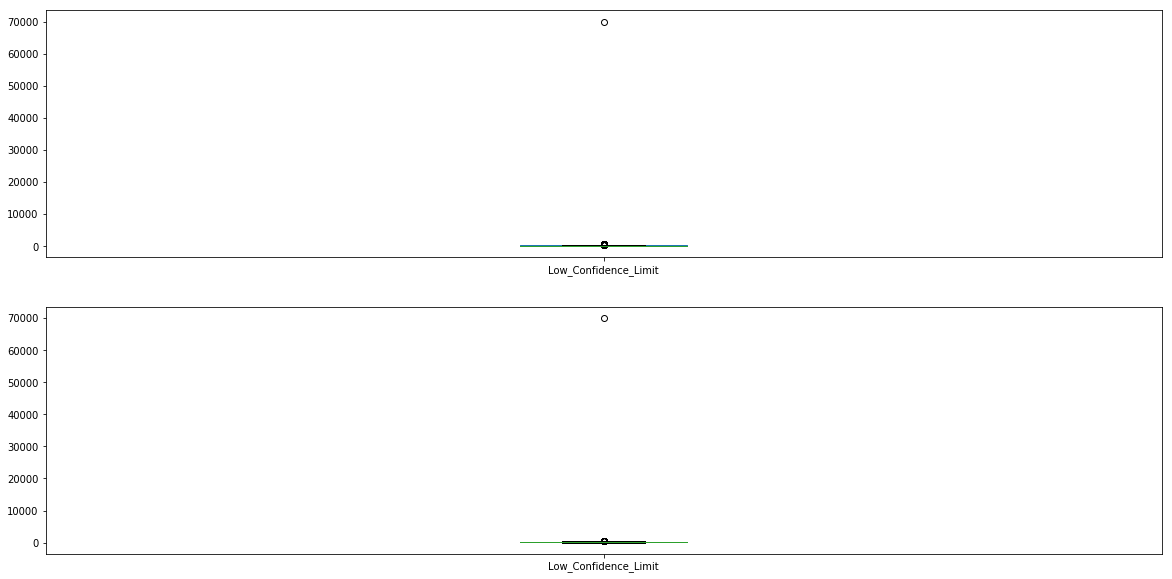

In [213]:
attri="Low_Confidence_Limit"
matplotlib.pyplot.subplot(2,1,1)
data_csv[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))
matplotlib.pyplot.subplot(2,1,2)
df[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))

(4) "High_Confidence_Limit"

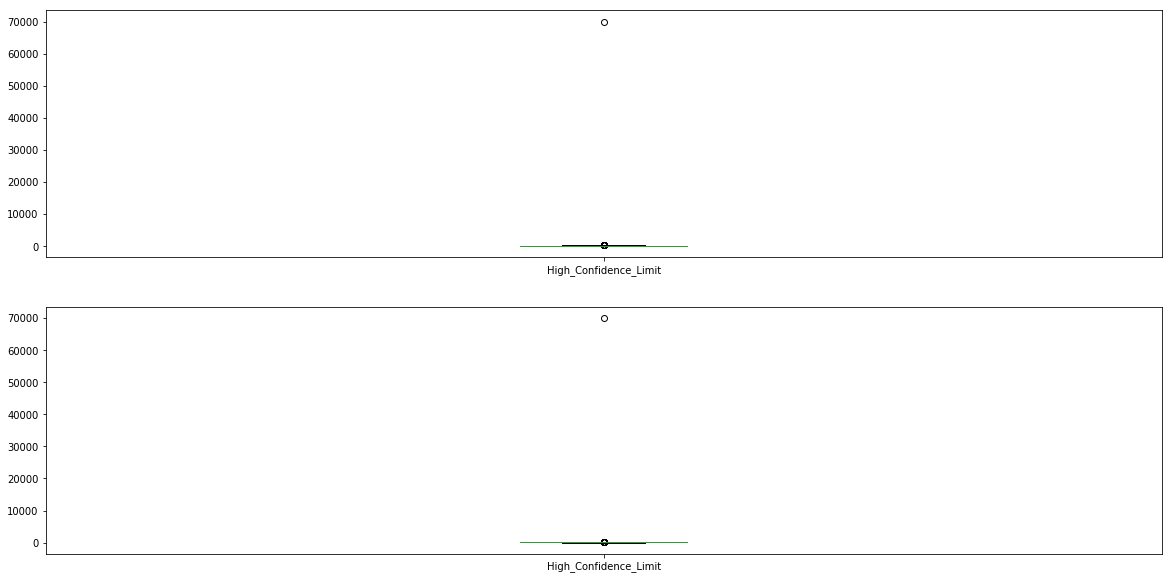

In [214]:
attri="High_Confidence_Limit"
matplotlib.pyplot.subplot(2,1,1)
data_csv[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))
matplotlib.pyplot.subplot(2,1,2)
df[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))

(5) "StratificationCategory2"

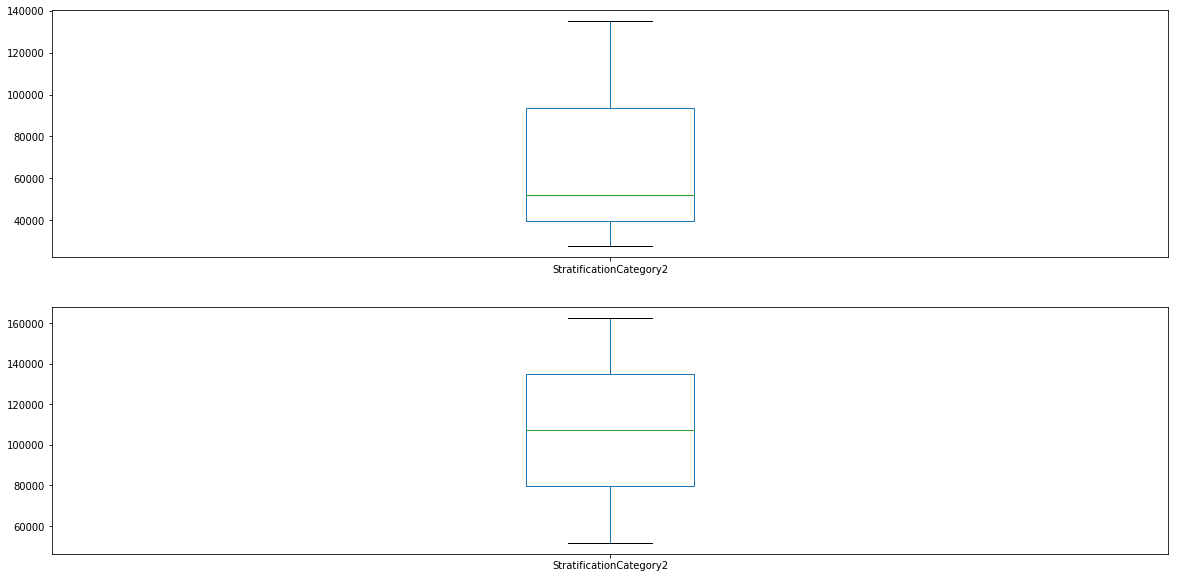

In [215]:
attri="StratificationCategory2"
matplotlib.pyplot.subplot(2,1,1)
data_csv[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))
matplotlib.pyplot.subplot(2,1,2)
df[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))

(6) "Stratification2"

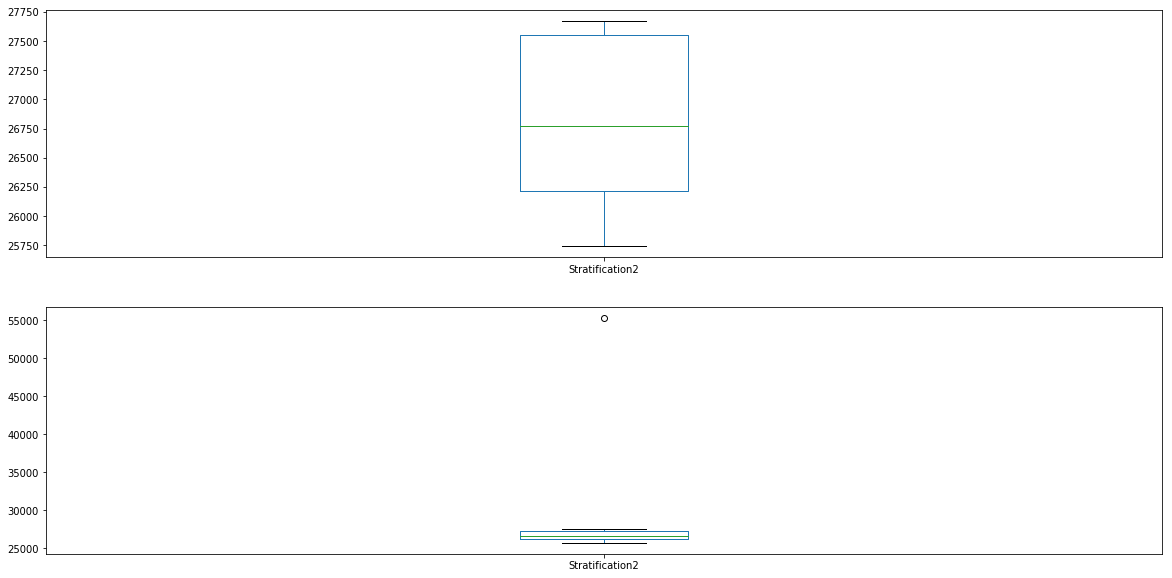

In [216]:
attri="Stratification2"
matplotlib.pyplot.subplot(2,1,1)
data_csv[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))
matplotlib.pyplot.subplot(2,1,2)
df[attri].value_counts(dropna=False).plot(kind='box',figsize=(20,10))